# Practice Session 01+02: Data preparation

Data scientists [spend a big chunk of their time preparing data](https://blog.ldodds.com/2020/01/31/do-data-scientists-spend-80-of-their-time-cleaning-data-turns-out-no/) and this is one of the first steps in any data mining project. This step is normally called **data preparation** or **data wrangling**.

The processes of getting an initial understanding of a dataset and preparing it usually go hand-in-hand, and it is critical to perform them well to obtain valid results later. Plus, you can save time and effort by learning how to do proper data preparation.

In this session, we will assume you just received a new dataset and need to do some initial steps with it:

1) Exploratory Data Analysis

* Calculate basis statistics as mean, median, variance, maximum and minimum
* Draw the box plot and identify outliers
* Calculate correlations between variables

2) Feature engineering:

* Deal with missing values
* Standardize all numerical columns
* Convert categorical columns to dummy binary variables
* Date and period management
* Feature generation

*Tip*: This process has several steps. It is tempting to maintain a single variable throughout the entire cleaning process, and do something like `x = x.step1()` then `x = x.step2()`. This will create problems for you because if you go back and re-execute a cell it might fail to operate on already transformed data. A better approach in cases like this where you do not have memory problems, is to do `x1 = x.step1()`, `x2 = x1.step2()` and so on, i.e., create a new variable after each transformation or set of transformations.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Judith Camacho</font>

E-mail: <font color="blue">judith.camacho01@estudiant.upf.edu</font>

Date: <font color="blue">05/10/2020</font>

# 0. The dataset

The dataset, contained in `device_db.csv` is a 10000 registers of mobile device purchases in a telco company. **Each record in the dataset describes a customer that buys a new mobile telephone**. The attributes are defined as follows:
 
0. PURCHASED_DEVICE: the mobile phone bought by the customer
1. DEVICE_VALUE: the cost of the mobile phone bought by the customer
2. LAST_DEVICE_DATE: the date of the previous mobile device purchase
3. DATA\_TRAFFIC\_MONTH_(1..6): The Mbps of data traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
4. VOICE\_TRAFFIC\_MONTH_(1..6): The minutes of voice traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
5. BILLING\_MONTH\_(1..6): Billing (USD) in the month (-1...-6) paid by the customer previous to the mobile device purchase
6. DEVICE\_COST\_MONTH_(1..6): Monthly cost (USD) associated to the mobile device finance in the month (-1...-6) paid by the customer previous to the mobile device purchase: proportion of owner-occupied units built prior to 1940
7. LINE\_ACTIVATION\_DATE: Date of the activation of the mobile line by the customer
8. MONTHS\_LAST\_DEVICE: Number of months of the previous mobile device
9. DURATION\_LINE: Number of months since the customer contracted the mobile line
10. PREVIOUS\_DEVICE\_MODEL: Model of the previous mobile phone
11. PREVIOUS\_DEVICE\_MANUF: Manufacturer of the previous mobile phone
12. PREVIOUS\_DEVICE\_BRAND: Brand of the previous mobile phone

This dataset will be used in next practices as recommendation engines.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Exploratory data analysis 

Exploratory Data Analysis (EDA) allows to us to have an understanding of the dataset from a stadistics perspective, i.e., data distribution and correlation between variables. This is crucial to select the most relevant variables for some purpose.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

We open the csv file contaning the data using separator ";" and assign to a dataframe variable (use `read_csv` from the Pandas library).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [3]:
input_dataset = pd.read_csv("device_db.csv", sep=",")

In [4]:
input_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [5]:
input_dataset.size

330000

## 1.1. Data types and simple statistics

To iterate through the columns of dataframe `df`, you can use `for column_name in df.columns`. To determine the data type of a column, you can use `df[column_name].dtype`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [6]:
for col in input_dataset.columns:
    print(input_dataset[col].dtype, '\n')



object 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

float64 

object 

object 

object 



To obtain a series from a dataframe you can reference an attribute by name, e.g., `input_dataset.DEVICE_VALUE` returns the series of all device values.

On a series, you can use functions from [numpy](https://numpy.org/doc/) such as `np.mean`, `np.median`, `np.std`, `np.min` and `np.max`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [7]:

print(np.mean(input_dataset))


DEVICE_VALUE             7.504842e+02
LAST_DEVICE_CHANGE       2.016698e+07
DATA_TRAFFIC_MONTH_1     3.481826e+03
DATA_TRAFFIC_MONTH_2     3.649958e+03
DATA_TRAFFIC_MONTH_3     3.653427e+03
DATA_TRAFFIC_MONTH_4     3.269441e+03
DATA_TRAFFIC_MONTH_5     3.673368e+03
DATA_TRAFFIC_MONTH_6     3.427690e+03
VOICE_TRAFFIC_MONTH_1    1.548522e+02
VOICE_TRAFFIC_MONTH_2    1.425679e+02
VOICE_TRAFFIC_MONTH_3    1.417125e+02
VOICE_TRAFFIC_MONTH_4    1.431492e+02
VOICE_TRAFFIC_MONTH_5    1.542773e+02
VOICE_TRAFFIC_MONTH_6    8.403332e+01
BILLING_MONTH_1          1.023446e+02
BILLING_MONTH_2          1.049752e+02
BILLING_MONTH_3          1.026768e+02
BILLING_MONTH_4          1.019943e+02
BILLING_MONTH_5          1.022081e+02
BILLING_MONTH_6          1.022684e+02
DEVICE_COST_MONTH_1      1.080778e+01
DEVICE_COST_MONTH_2      1.058732e+01
DEVICE_COST_MONTH_3      1.171326e+01
DEVICE_COST_MONTH_4      1.155437e+01
DEVICE_COST_MONTH_5      1.251086e+01
DEVICE_COST_MONTH_6      1.297901e+01
LINE_ACTIVAT

In [8]:
print(input_dataset.median())

DEVICE_VALUE             3.930000e+02
LAST_DEVICE_CHANGE       2.017060e+07
DATA_TRAFFIC_MONTH_1     1.208728e+03
DATA_TRAFFIC_MONTH_2     1.294951e+03
DATA_TRAFFIC_MONTH_3     1.310675e+03
DATA_TRAFFIC_MONTH_4     1.176539e+03
DATA_TRAFFIC_MONTH_5     1.287094e+03
DATA_TRAFFIC_MONTH_6     1.277116e+03
VOICE_TRAFFIC_MONTH_1    8.405000e+01
VOICE_TRAFFIC_MONTH_2    7.490000e+01
VOICE_TRAFFIC_MONTH_3    7.440000e+01
VOICE_TRAFFIC_MONTH_4    7.510000e+01
VOICE_TRAFFIC_MONTH_5    8.285000e+01
VOICE_TRAFFIC_MONTH_6    6.200000e+00
BILLING_MONTH_1          9.499000e+01
BILLING_MONTH_2          9.643000e+01
BILLING_MONTH_3          9.624500e+01
BILLING_MONTH_4          9.489000e+01
BILLING_MONTH_5          9.529000e+01
BILLING_MONTH_6          9.499000e+01
DEVICE_COST_MONTH_1      0.000000e+00
DEVICE_COST_MONTH_2      0.000000e+00
DEVICE_COST_MONTH_3      0.000000e+00
DEVICE_COST_MONTH_4      0.000000e+00
DEVICE_COST_MONTH_5      0.000000e+00
DEVICE_COST_MONTH_6      0.000000e+00
LINE_ACTIVAT

In [9]:
print(np.std(input_dataset))

DEVICE_VALUE               979.659719
LAST_DEVICE_CHANGE       10925.063714
DATA_TRAFFIC_MONTH_1      6364.183847
DATA_TRAFFIC_MONTH_2      6443.993134
DATA_TRAFFIC_MONTH_3      6382.243226
DATA_TRAFFIC_MONTH_4      5675.224744
DATA_TRAFFIC_MONTH_5      6589.027785
DATA_TRAFFIC_MONTH_6      5885.078230
VOICE_TRAFFIC_MONTH_1      218.238284
VOICE_TRAFFIC_MONTH_2      200.563027
VOICE_TRAFFIC_MONTH_3      198.532614
VOICE_TRAFFIC_MONTH_4      200.495675
VOICE_TRAFFIC_MONTH_5      210.527435
VOICE_TRAFFIC_MONTH_6      161.334497
BILLING_MONTH_1             67.783766
BILLING_MONTH_2             76.944990
BILLING_MONTH_3             66.622064
BILLING_MONTH_4             64.390113
BILLING_MONTH_5             64.016165
BILLING_MONTH_6             65.456214
DEVICE_COST_MONTH_1         75.830810
DEVICE_COST_MONTH_2         36.994115
DEVICE_COST_MONTH_3         44.430376
DEVICE_COST_MONTH_4         34.174251
DEVICE_COST_MONTH_5         38.873741
DEVICE_COST_MONTH_6         39.526044
LINE_ACTIVAT

In [10]:
print(np.min(input_dataset))

DEVICE_VALUE                   15.00
LAST_DEVICE_CHANGE       20121001.00
DATA_TRAFFIC_MONTH_1            0.00
DATA_TRAFFIC_MONTH_2            0.00
DATA_TRAFFIC_MONTH_3            0.00
DATA_TRAFFIC_MONTH_4            0.00
DATA_TRAFFIC_MONTH_5            0.00
DATA_TRAFFIC_MONTH_6            0.00
VOICE_TRAFFIC_MONTH_1           0.00
VOICE_TRAFFIC_MONTH_2           0.00
VOICE_TRAFFIC_MONTH_3           0.00
VOICE_TRAFFIC_MONTH_4           0.00
VOICE_TRAFFIC_MONTH_5           0.00
VOICE_TRAFFIC_MONTH_6           0.00
BILLING_MONTH_1              -128.01
BILLING_MONTH_2                 0.00
BILLING_MONTH_3                 0.00
BILLING_MONTH_4                 0.00
BILLING_MONTH_5                 0.00
BILLING_MONTH_6                 0.00
DEVICE_COST_MONTH_1             0.00
DEVICE_COST_MONTH_2             0.00
DEVICE_COST_MONTH_3             0.00
DEVICE_COST_MONTH_4             0.00
DEVICE_COST_MONTH_5             0.00
DEVICE_COST_MONTH_6             0.00
LINE_ACTIVATION_DATE     19920804.00
M

In [11]:
print(np.max(input_dataset))

DEVICE_VALUE             9.057000e+03
LAST_DEVICE_CHANGE       2.019050e+07
DATA_TRAFFIC_MONTH_1     1.270176e+05
DATA_TRAFFIC_MONTH_2     1.119488e+05
DATA_TRAFFIC_MONTH_3     1.119488e+05
DATA_TRAFFIC_MONTH_4     8.785641e+04
DATA_TRAFFIC_MONTH_5     1.218348e+05
DATA_TRAFFIC_MONTH_6     9.055061e+04
VOICE_TRAFFIC_MONTH_1    4.220100e+03
VOICE_TRAFFIC_MONTH_2    3.132100e+03
VOICE_TRAFFIC_MONTH_3    2.992500e+03
VOICE_TRAFFIC_MONTH_4    3.163300e+03
VOICE_TRAFFIC_MONTH_5    3.429100e+03
VOICE_TRAFFIC_MONTH_6    2.129500e+03
BILLING_MONTH_1          1.569100e+03
BILLING_MONTH_2          2.032120e+03
BILLING_MONTH_3          1.741210e+03
BILLING_MONTH_4          1.084820e+03
BILLING_MONTH_5          9.117200e+02
BILLING_MONTH_6          1.187300e+03
DEVICE_COST_MONTH_1      6.440000e+03
DEVICE_COST_MONTH_2      1.360000e+03
DEVICE_COST_MONTH_3      2.466000e+03
DEVICE_COST_MONTH_4      4.550000e+02
DEVICE_COST_MONTH_5      1.258000e+03
DEVICE_COST_MONTH_6      1.000000e+03
LINE_ACTIVAT

The `describe` function can be used to describe a series. To invoke it simply do `input_dataset.DEVICE_VALUE.describe()`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [12]:
print(input_dataset.describe())

       DEVICE_VALUE  LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  \
count   9690.000000        7.682000e+03           8868.000000   
mean     750.484211        2.016698e+07           3481.825663   
std      979.710272        1.092577e+04           6364.542706   
min       15.000000        2.012100e+07              0.000000   
25%      297.000000        2.016080e+07             51.923114   
50%      393.000000        2.017060e+07           1208.728050   
75%      609.000000        2.017100e+07           4249.164900   
max     9057.000000        2.019050e+07         127017.590000   

       DATA_TRAFFIC_MONTH_2  DATA_TRAFFIC_MONTH_3  DATA_TRAFFIC_MONTH_4  \
count           8841.000000           8846.000000           8817.000000   
mean            3649.957795           3653.426959           3269.440625   
std             6444.357603           6382.603999           5675.546606   
min                0.000000              0.000000              0.000000   
25%               46.542538            

The differences are in the way python prints some of the values. Also, describe () returns more values such as the quantiles.

## 1.2. Census of device models

In exploratory data analysis, it is very useful to do a **census** of the possible values of a variable. For us, a census will be a frequency table in which you show the possible values of a variable, and their frequency, in decreasing order of frequency.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to display a census of PURCHASED_DEVICE and PREVIOUS_DEVICE_MODEL.</font>

In [13]:
input_dataset["PURCHASED_DEVICE"].value_counts()


TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07    5379
TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P1769/07     451
TGAL03462000_ALCATEL 5033J SMART PRETO                    353
TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI107/04       255
TGSA31962007_SAMSUNG J410G SMART PRETO PPB/PI107/04       223
                                                         ... 
TGSA31464007_SAMSUNG J600GT SMART PRETO PPB/PI324/14        1
TGSA29664000_SAMSUNG G950 SMART PRETO PPB/PI324/14          1
TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI107/04        1
TGLG29362000_LG Q610BA SMARTPHONE PRETO PPB/P1769/07        1
TGSA28564007_SAMSUNG J105 SMART PRETO  PPB/PI324/14         1
Name: PURCHASED_DEVICE, Length: 101, dtype: int64

In [14]:
input_dataset["PREVIOUS_DEVICE_MODEL"].value_counts()


iPhone 7                  425
iPhone 6                  250
Samsung Galaxy J5         243
iPhone 6S                 212
Samsung Galaxy J1 Mini    204
                         ... 
Samsung Ch@t 226 Duos       1
iPad Mini                   1
YC-120                      1
Galaxy S4 GT-I9500          1
MF253L                      1
Name: PREVIOUS_DEVICE_MODEL, Length: 580, dtype: int64

# 2. Feature engineering

Feature engineering is the process of extracting valuable features from the data. This requires pre-processing, combining, normalizing, and performing other operations on the values of some features.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Missing values management

**Not A Number** (NaN) is a generic term to refer to *something that should be a number, but is not*. Usually, the value is either missing completely ("null") or contains the wrong type of object, such as a string or a concept such as infinity.

To find which columns contain NaN values, you can use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function, as explained, e.g., [here](https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab). 

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [15]:
input_dataset.isna()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


The way **NaNs** are managed varies according to the meaning of each variable. In some occasions, registers should be removed, filled with other columns or calculated (imputed).

* To delete rows containing a null value, we can use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* To replace null values, we can use [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Please note that these steps should be applied sequentially, i.e., the output of one step should be fed into the next step.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to eliminate rows with NaN values in **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, **LINE\_ACTIVATION\_DATE**, **PREVIOUS\_DEVICE\_MODEL** and **PREVIOUS\_DEVICE\_BRAND**</font>

In [16]:
columns = ["PURCHASED_DEVICE", "DEVICE_VALUE", "LINE_ACTIVATION_DATE", "PREVIOUS_DEVICE_MODEL","PREVIOUS_DEVICE_BRAND"]
input_dataset1 = input_dataset.dropna(subset = columns)

In [17]:
input_dataset1.DEVICE_VALUE.isna().sum()

0

<font size="+1" color="red">Replace this cell with code to assign 0 to NaN values in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_TRAFFIC\_MONTH_(1..6)** and **DEVICE\_COST\_MONTH\_(1..6)**</font>

In [18]:
input_dataset2 = input_dataset1
cols = input_dataset2.columns
fill_cols = cols.drop(["PURCHASED_DEVICE", "DEVICE_VALUE", "LAST_DEVICE_CHANGE", "LINE_ACTIVATION_DATE",
                        "MONTHS_LAST_DEVICE", "DURATION_LINE", "PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_MANUF",
                        "PREVIOUS_DEVICE_BRAND"])

input_dataset2[fill_cols] = input_dataset1[fill_cols].fillna(value=0)


C:\Users\Judith\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
input_dataset2.size

182160

### <font size="+1" color="red">Replace this cell with code to replace null values in **LINE\_ACTIVATION\_DATE** with the corresponding value of the **LAST\_DEVICE\_CHANGE** variable</font>

In [20]:
input_dataset3 = input_dataset2

is_na = input_dataset3["LINE_ACTIVATION_DATE"].isna()

input_dataset3[is_na]["LINE_ACTIVATION_DATE"] = input_dataset3[is_na]["LAST_DEVICE_CHANGE"]

<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [21]:
input_dataset3.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with a brief commentary indicating the new dimensions of the dataset (rows and columns), and the names of the columns that still contain NaN values, if any</font>

In [22]:
input_dataset3.isna().sum(axis=0)

PURCHASED_DEVICE            0
DEVICE_VALUE                0
LAST_DEVICE_CHANGE       1290
DATA_TRAFFIC_MONTH_1        0
DATA_TRAFFIC_MONTH_2        0
DATA_TRAFFIC_MONTH_3        0
DATA_TRAFFIC_MONTH_4        0
DATA_TRAFFIC_MONTH_5        0
DATA_TRAFFIC_MONTH_6        0
VOICE_TRAFFIC_MONTH_1       0
VOICE_TRAFFIC_MONTH_2       0
VOICE_TRAFFIC_MONTH_3       0
VOICE_TRAFFIC_MONTH_4       0
VOICE_TRAFFIC_MONTH_5       0
VOICE_TRAFFIC_MONTH_6       0
BILLING_MONTH_1             0
BILLING_MONTH_2             0
BILLING_MONTH_3             0
BILLING_MONTH_4             0
BILLING_MONTH_5             0
BILLING_MONTH_6             0
DEVICE_COST_MONTH_1         0
DEVICE_COST_MONTH_2         0
DEVICE_COST_MONTH_3         0
DEVICE_COST_MONTH_4         0
DEVICE_COST_MONTH_5         0
DEVICE_COST_MONTH_6         0
LINE_ACTIVATION_DATE        0
MONTHS_LAST_DEVICE       1290
DURATION_LINE               0
PREVIOUS_DEVICE_MODEL       0
PREVIOUS_DEVICE_MANUF       0
PREVIOUS_DEVICE_BRAND       0
dtype: int

The dataset has the same dimensions as the beginning because I haven't dropped any column. 
But, talking in terms of size dimensions, it has passed from 330000x33 to 182160x33. 
Also, LAST_DEVICE_CHANGE and MONTHS_LAST_DEVICE contain both 1290 NaN.

## 2.2. Distributions, outliers, and correlations

We will now plot the distributions of some variables and apply some transformations.

* You can use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram.
* You can use [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with `kind='box'` to create a boxplot.
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to plot a histogram of each of **DEVICE\_VALUE**, **DATA\_TRAFFIC\_MONTH\_1-3**, **VOICE\_TRAFFIC\_MONTH\_1-3**, **BILLING\_MONTH\_1-3**, **DEVICE\_COST\_MONTH\_1-3**, **DURATION\_LINE**.</font>


<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

In [23]:
subset = ["DEVICE_VALUE", "DATA_TRAFFIC_MONTH_1", "DATA_TRAFFIC_MONTH_2", "DATA_TRAFFIC_MONTH_3",
         "VOICE_TRAFFIC_MONTH_1", "VOICE_TRAFFIC_MONTH_2", "VOICE_TRAFFIC_MONTH_3",
         "BILLING_MONTH_1", "BILLING_MONTH_2", "BILLING_MONTH_3",
          "DEVICE_COST_MONTH_1", "DEVICE_COST_MONTH_2", "DEVICE_COST_MONTH_3", "DURATION_LINE"]

plt.rcParams["figure.figsize"] = (9, 7)
'''
axes = plt.subplots(14, 1, sharex=True)

for  i in range(len(subset)):
    sns.distplot(input_dataset3[subset[i]], kde=False, ax=axes[i], bins=20)
'''
    
    

'\naxes = plt.subplots(14, 1, sharex=True)\n\nfor  i in range(len(subset)):\n    sns.distplot(input_dataset3[subset[i]], kde=False, ax=axes[i], bins=20)\n'

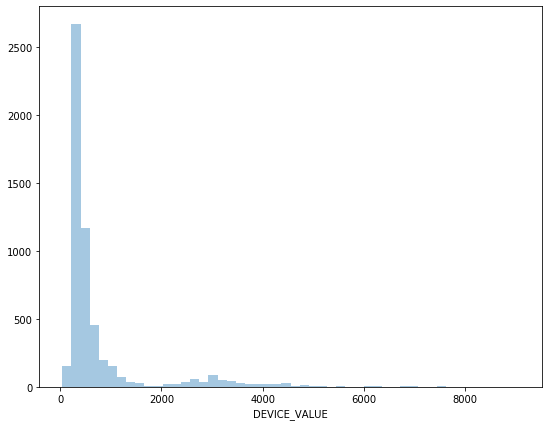

In [24]:
sns.distplot(input_dataset3[subset[0]], kde=False)

F distribution, might be bimodal due to the light increase that we can see between 2000 and 4000, which assimilates to a normal distribution.

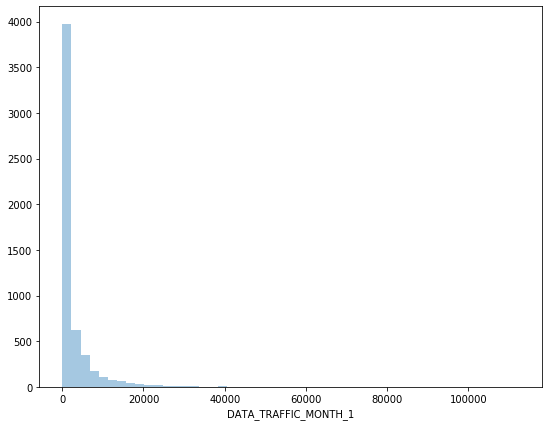

In [25]:
sns.distplot(input_dataset3[subset[1]], kde=False)

Unimodal Exponential distribution.

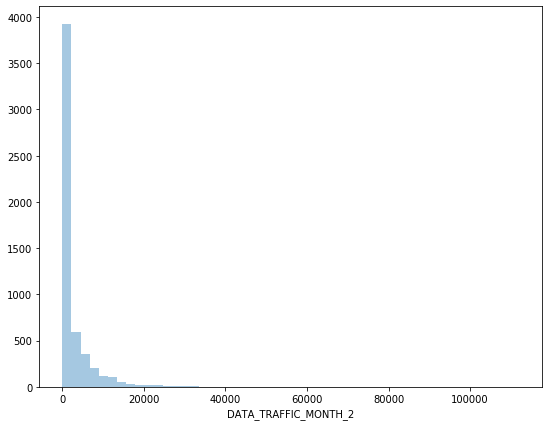

In [26]:
sns.distplot(input_dataset3[subset[2]], kde=False)

Unimodal Exponential distribution.

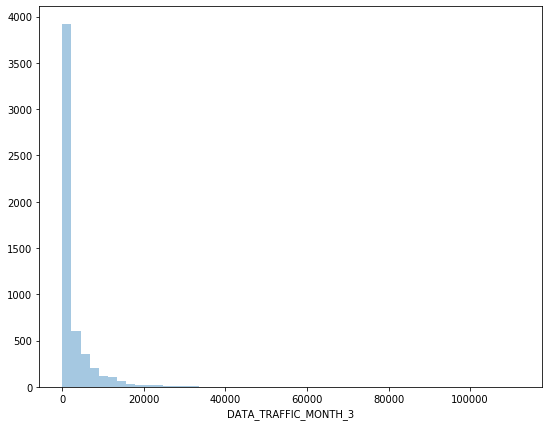

In [27]:
sns.distplot(input_dataset3[subset[3]], kde=False)

Unimodal Exponential distribution.

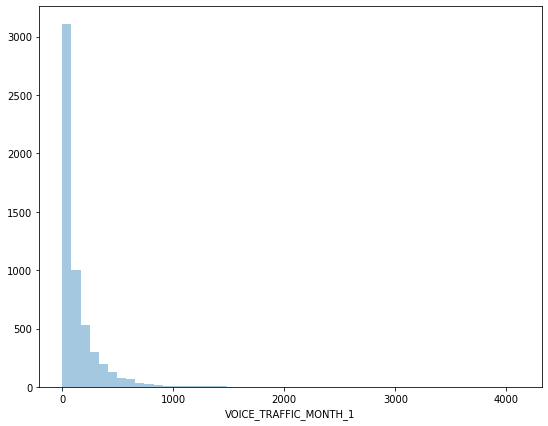

In [28]:
sns.distplot(input_dataset3[subset[4]], kde=False)

Unimodal Exp distribution

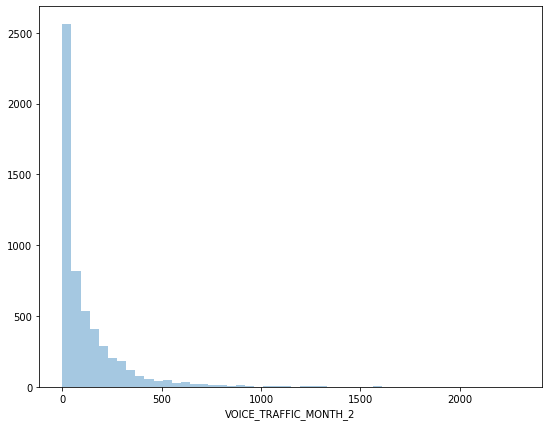

In [29]:
sns.distplot(input_dataset3[subset[5]], kde=False)

unimodal exponential distribution

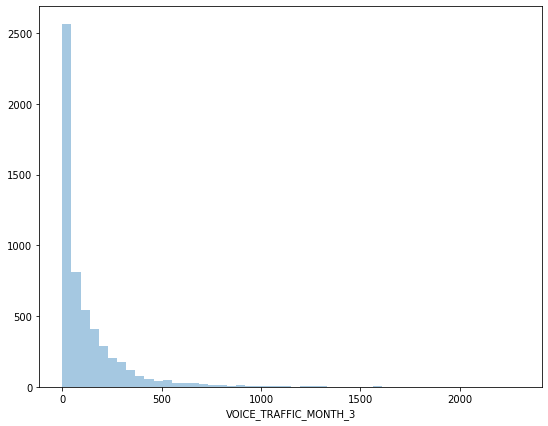

In [30]:
sns.distplot(input_dataset3[subset[6]], kde=False)

Unimodal exponential distribution

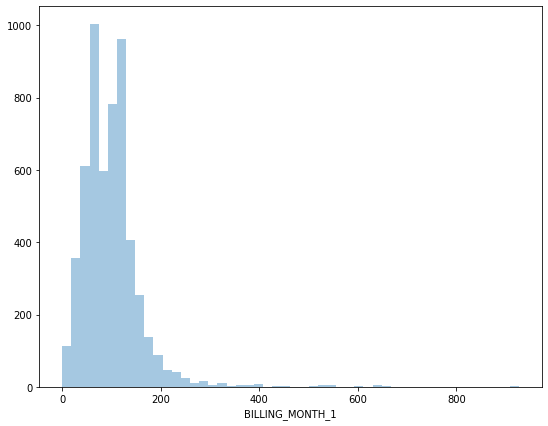

In [31]:
sns.distplot(input_dataset3[subset[7]], kde=False)

Bimodal Poisson distribution

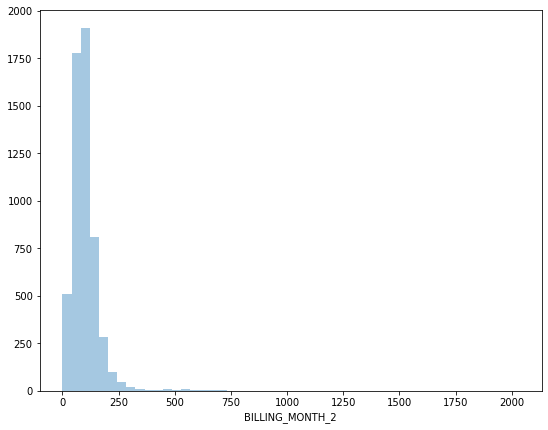

In [32]:
sns.distplot(input_dataset3[subset[8]], kde=False)

Poisson bimodal distribution

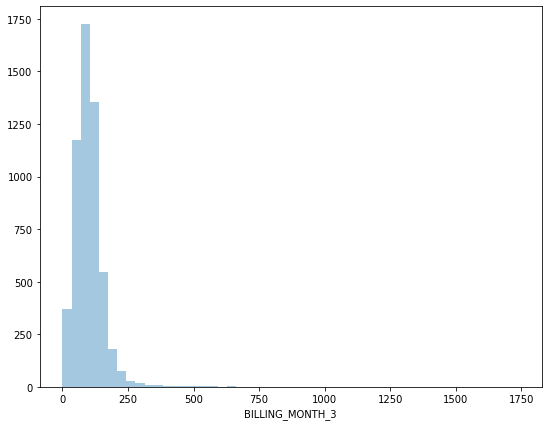

In [33]:
sns.distplot(input_dataset3[subset[9]], kde=False)

Poisson bimodal distribution

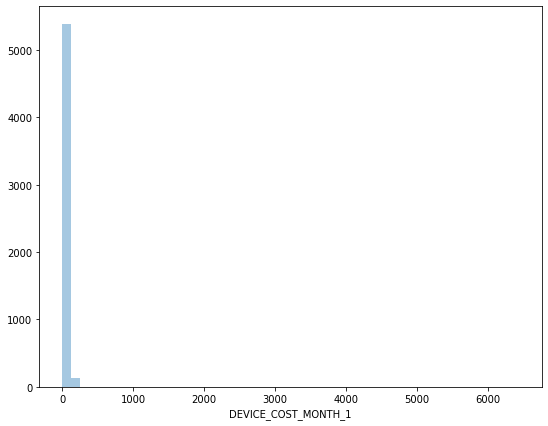

In [34]:
sns.distplot(input_dataset3[subset[10]], kde=False)

From this plot we cannot say with any confidence what kind of distribution it is. 

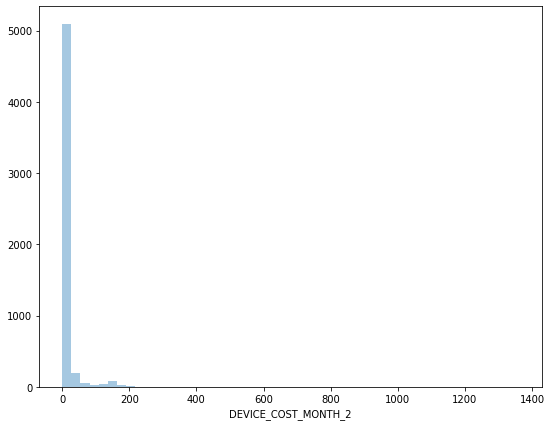

In [35]:
sns.distplot(input_dataset3[subset[11]], kde=False)

Exponential bimodal distribution (aprox between 100 and 200 we can se a normal)

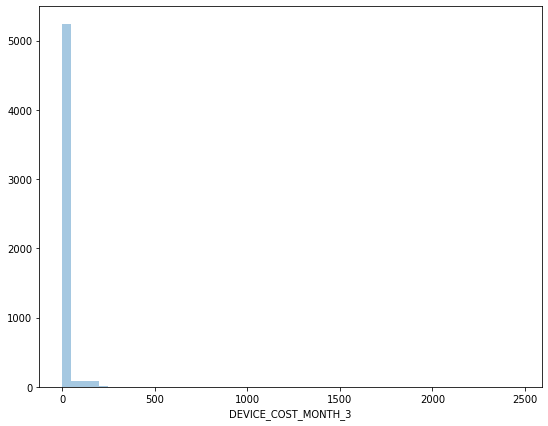

In [36]:
sns.distplot(input_dataset3[subset[12]], kde=False)

From this plot we cannot say with any confidence what kind of distribution it is. 

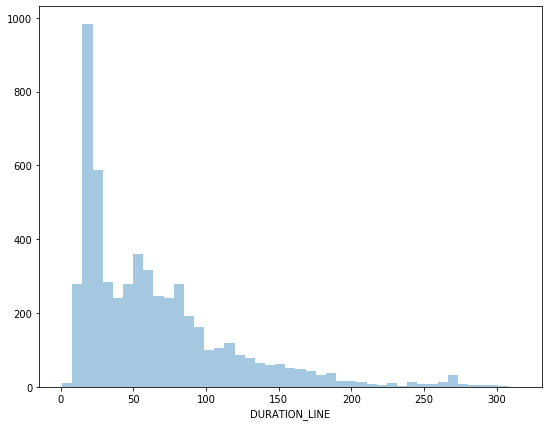

In [37]:
sns.distplot(input_dataset3[subset[13]], kde=False)

We can say that until 30 we have a Normal distribution, and then, a Poisson distribution.

Variables having exponential distribution can be processed and visualized better after transforming them, usually by applying the `log()` function.
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to apply **log(x)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


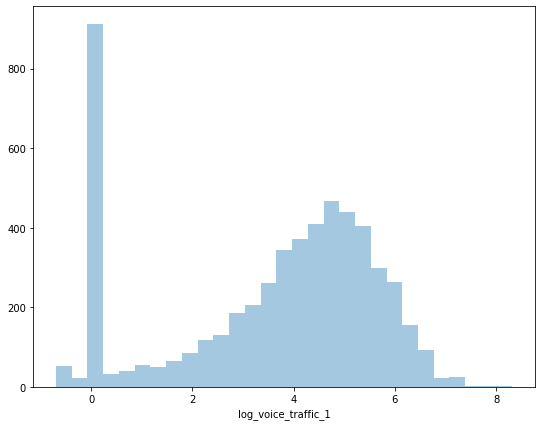

In [38]:
def try_log(x):
    if x> 0:
        return np.log(x)
    return 0
input_dataset3["log_voice_traffic_1"] = input_dataset3[subset[4]].apply(try_log)
sns.distplot(input_dataset3["log_voice_traffic_1"], kde=False)

<font size="+1" color="red">Replace this cell with code to create a boxplot for variables **DATA\_TRAFFIC\_MONTH\_1**, **VOICE\_TRAFFIC\_MONTH\_1** and **BILLING\_MONTH\_1**</font>

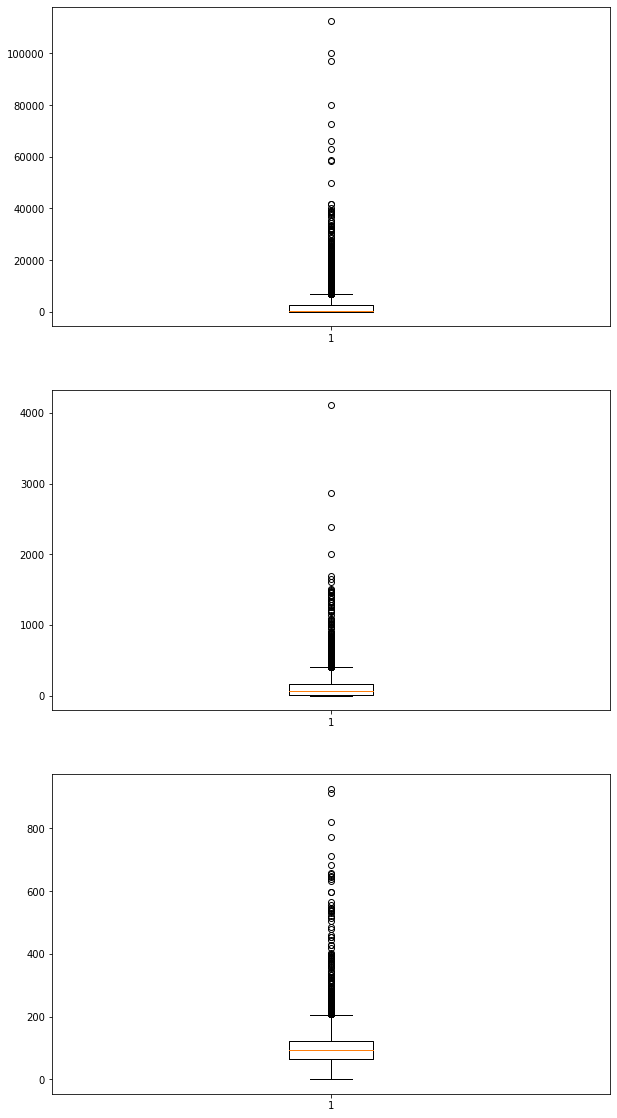

In [39]:
i = 311    
cols = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']
plt.subplot
plt.figure(figsize = (10, 20))
for c in cols:
    plt.subplot(i)
    plt.boxplot(input_dataset3[c])
    i+=1

<font size="+1" color="red">Replace this cell with a brief indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

In order of appearence of the boxplots, I will use as a threshold for outliers the values from which the rest of circles begin to be much more spread: 7000, 2000, 800 aprox.

In this dataset, there are many dependencies between different attributes, e.g., a large voice traffic will probably be associated with a large data traffic, a more expensive bill, and possibly a more expensive device (`DEVICE_VALUE`).

You can use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value.</font>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

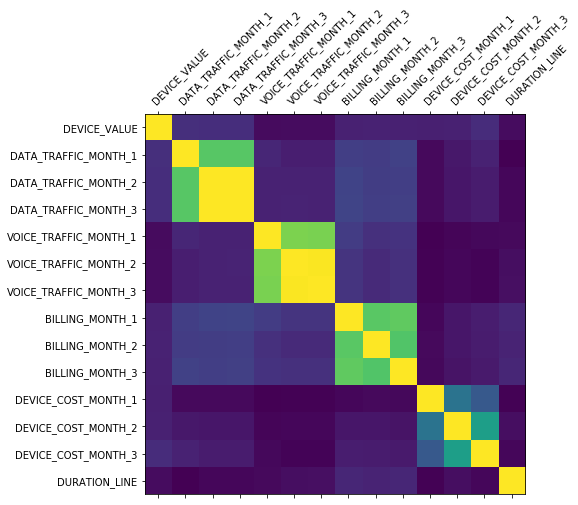

In [40]:
correlation_dataset = input_dataset3.filter(subset)
correlation_matrix = correlation_dataset.corr()

fig = plt.figure()

ax = plt.gca()

ax.matshow(correlation_matrix)
n = len(correlation_dataset.columns)

ax.set_xticks(np.arange(n))
ax.set_xticklabels(correlation_dataset.columns)
ax.set_yticks(np.arange(n))
ax.set_yticklabels(correlation_dataset.columns)

plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=45,
         ha="left", rotation_mode="anchor")

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Which are the variables that are more correlated and less correlated with the DEVICE_VALUE variable?</font>

We can see that variables that are highly corralated are those of the same kind but different months, i.e: billing_month_1 with billing_month_2 and billing_month_3, and so on. It makes sense because the Minutes you spend talking, have nothing to do with the data traffic. 
Also, all of the variables are very low correlated to device_value, which makes perfect sense, because the value of the phone has nothing to do with traffic costs. The variables that could be correlated are the device_cost_month_1...3 since, the higher the price of the phone, the more you pay every month. But from this plot, we cannot appreciate that.

## 2.3. Date management and period calculation

Tip: use `date.today()` to obtain the current date, and [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert dates as strings into dates as a numerical representation, to do arithmetic.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to update the **MONTHS_LAST_DEVICE** value to be the difference, in months (=30 days), between **LAST_DEVICE_CHANGE** and today.</font>

In [41]:
from datetime import datetime
ldc = pd.to_datetime(input_dataset3['LAST_DEVICE_CHANGE'], format='%Y%m%d') #convert to format
t = ((datetime.now() - ldc) / 30 / np.timedelta64(1, 'D')) #calculate values
input_dataset3["MONTHS_LAST_DEVICE"] = t

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and today

In [42]:
lad = pd.to_datetime(input_dataset3['LINE_ACTIVATION_DATE'], format='%Y%m%d') #convert to format
t = ((datetime.now() - ldc) / 30 / np.timedelta64(1, 'D')) #calculate values
input_dataset3["DURATION_LINE"] = t

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 2.4. Standarization of numerical variables

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

You can use [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standarize a variable.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to standardize the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STAND** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND). Plot a histogram for each new variable.</font>



In [43]:
cols = ["DATA_TRAFFIC_MONTH_1", "VOICE_TRAFFIC_MONTH_1", "BILLING_MONTH_1", "DEVICE_COST_MONTH_1"]
stand_dataset = input_dataset3[cols]
scaler = StandardScaler()
stand_dataset[cols] = scaler.fit_transform(stand_dataset[cols].values)
stand_dataset = stand_dataset.add_suffix("_STAND")
input_dataset3 = pd.concat([input_dataset3, stand_dataset], axis=1)
input_dataset3.head()
    
    
stand_cols = ["DATA_TRAFFIC_MONTH_1_STAND", "VOICE_TRAFFIC_MONTH_1_STAND", "BILLING_MONTH_1_STAND", "DEVICE_COST_MONTH_1_STAND"]

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Judith\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Judith\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

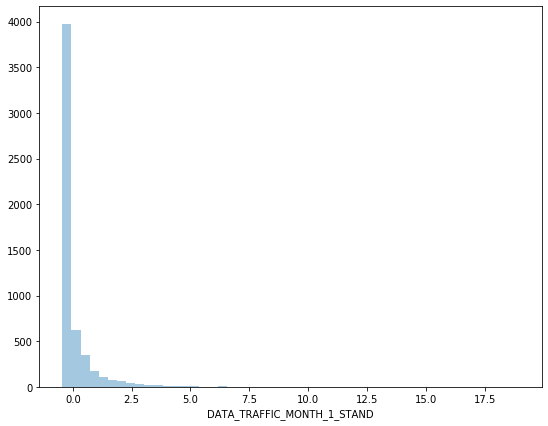

In [44]:
sns.distplot(input_dataset3[stand_cols[0]], kde=False)

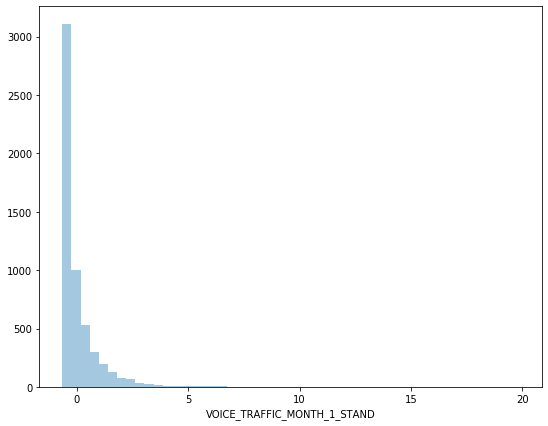

In [45]:
sns.distplot(input_dataset3[stand_cols[1]], kde=False)

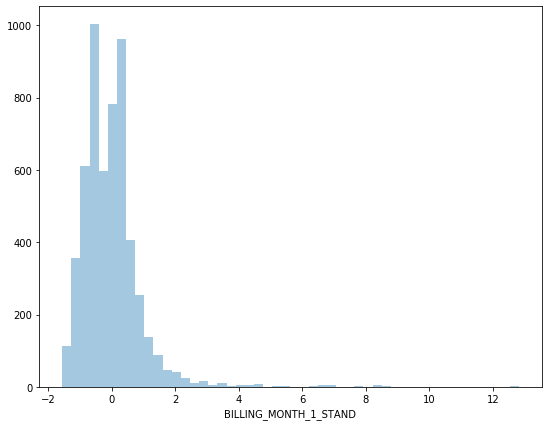

In [46]:
sns.distplot(input_dataset3[stand_cols[2]], kde=False)

Normalizing a dataset refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra).

You can use [Normalizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) to normalize a variable.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to normalize the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name follow by **_NORM**. Plot a histogram for each new variable.</font>

In [47]:
cols = ["DATA_TRAFFIC_MONTH_1", "VOICE_TRAFFIC_MONTH_1", "BILLING_MONTH_1", "DEVICE_COST_MONTH_1"]
norm_dataset = input_dataset3[cols]
transformer = Normalizer().fit(norm_dataset)
transformer.transform(norm_dataset)
norm_dataset = norm_dataset.add_suffix("_NORM")
input_dataset3 = pd.concat([input_dataset3, norm_dataset], axis=1)

input_dataset3.head()


norm_cols = ["DATA_TRAFFIC_MONTH_1_NORM", "VOICE_TRAFFIC_MONTH_1_NORM", "BILLING_MONTH_1_NORM", "DEVICE_COST_MONTH_1_NORM"]

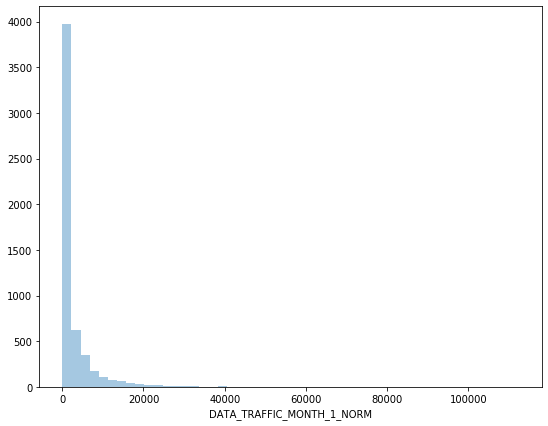

In [48]:
sns.distplot(input_dataset3[norm_cols[0]], kde=False)

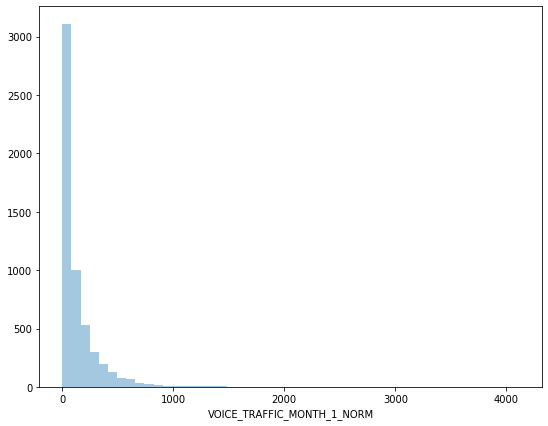

In [49]:
sns.distplot(input_dataset3[norm_cols[1]], kde=False)

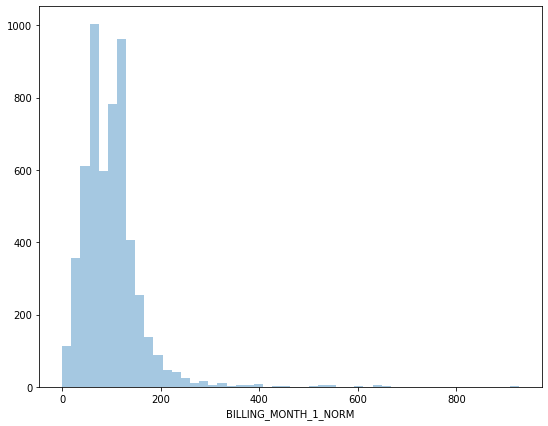

In [50]:
sns.distplot(input_dataset3[norm_cols[2]], kde=False)

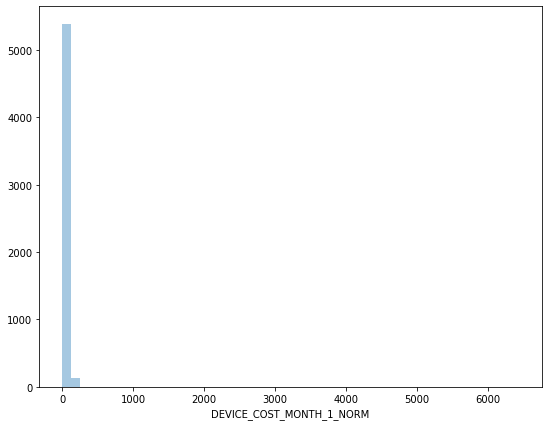

In [51]:
sns.distplot(input_dataset3[norm_cols[3]], kde=False)

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1.

You can use [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to rescale a variable between max and min values.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to rescale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name follow by **_MINMAXSC**. Plot a histogram for each new variable.</font>

In [52]:
cols = ["DATA_TRAFFIC_MONTH_1", "VOICE_TRAFFIC_MONTH_1", "BILLING_MONTH_1", "DEVICE_COST_MONTH_1"]
minmax_dataset = input_dataset3[cols]
scaler = MinMaxScaler()
minmax_dataset[cols] = scaler.fit_transform(minmax_dataset[cols].values)
minmax_dataset = minmax_dataset.add_suffix("_MINMAXSC")
input_dataset3 = pd.concat([input_dataset3, minmax_dataset], axis=1)
input_dataset3.head()
    
    
minmax_cols = ["DATA_TRAFFIC_MONTH_1_MINMAXSC", "VOICE_TRAFFIC_MONTH_1_MINMAXSC", "BILLING_MONTH_1_MINMAXSC", "DEVICE_COST_MONTH_1_MINMAXSC"]

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Judith\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Judith\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

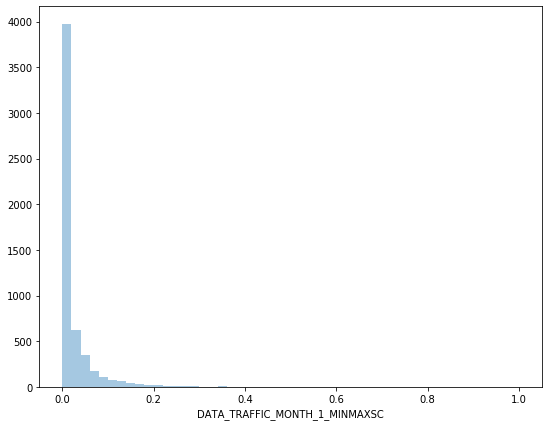

In [53]:
sns.distplot(input_dataset3[minmax_cols[0]], kde=False)

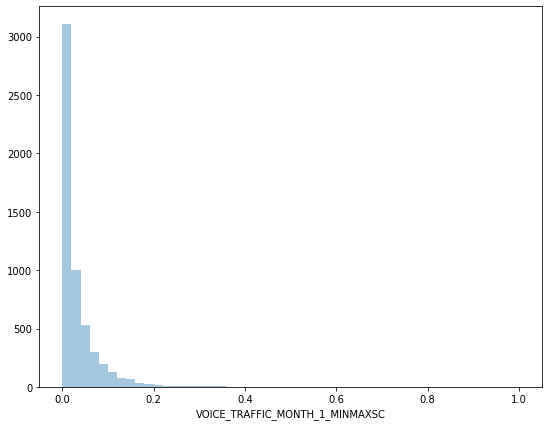

In [54]:
sns.distplot(input_dataset3[minmax_cols[1]], kde=False)

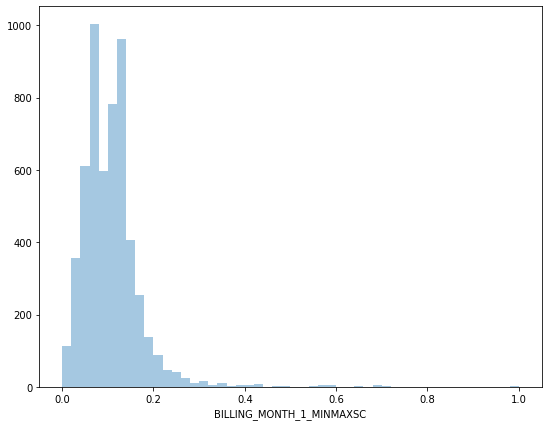

In [55]:
sns.distplot(input_dataset3[minmax_cols[2]], kde=False)

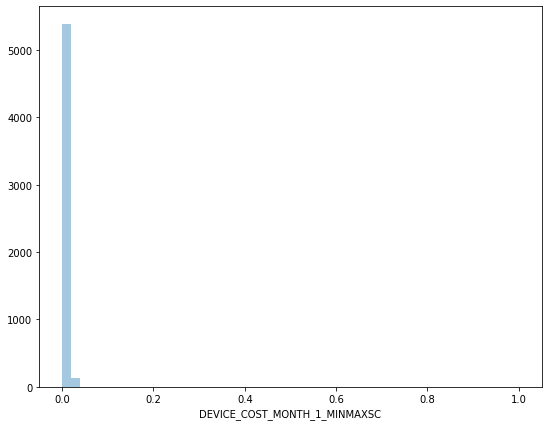

In [56]:
sns.distplot(input_dataset3[minmax_cols[3]], kde=False)

## 2.5. Convert categorical columns to dummy binary variables

Categorical variables usually need to be transformed into numerical values to apply some machine learning methods.

* Use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform a categorical variable to integer values.
* Use [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) after integer encoding (i.e. [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) to transform a categorical variable into integer values and finally into a one hot value.
   * Alternatively, you can use [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) instead of OneHotEncoder().

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_BRAND** to a new integer variable with name **PREVIOUS_DEVICE_BRAND_INTEGER_ENCOD** and dummy binary variables. Convert **PREVIOUS_DEVICE_MODEL** to a new integer variable with name **PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD** and dummy binary variables.</font>

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit
input_dataset3["PREVIOUS_DEVICE_BRAND_INTEGER_ENCOD"] = le.fit_transform(input_dataset3.PREVIOUS_DEVICE_BRAND)
le.fit(input_dataset3.PREVIOUS_DEVICE_MODEL)
input_dataset3["PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD"] = le.fit_transform(input_dataset3.PREVIOUS_DEVICE_MODEL)



In [58]:
input_dataset3.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DATA_TRAFFIC_MONTH_1_NORM,VOICE_TRAFFIC_MONTH_1_NORM,BILLING_MONTH_1_NORM,DEVICE_COST_MONTH_1_NORM,DATA_TRAFFIC_MONTH_1_MINMAXSC,VOICE_TRAFFIC_MONTH_1_MINMAXSC,BILLING_MONTH_1_MINMAXSC,DEVICE_COST_MONTH_1_MINMAXSC,PREVIOUS_DEVICE_BRAND_INTEGER_ENCOD,PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,465.24673,47.50000,86.77,12.0,0.004138,0.011549,0.093663,0.001863,2,262
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,232.24121,3.70000,47.52,0.0,0.002066,0.000900,0.051295,0.000000,4,418
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,484.62036,26.10000,122.08,0.0,0.004311,0.006346,0.131778,0.000000,2,252
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,4255.46040,175.70000,60.39,6.0,0.037853,0.042718,0.065187,0.000932,0,542
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,5014.10300,383.89999,110.69,0.0,0.044601,0.093338,0.119483,0.000000,3,143


## 2.6. Feature generation

In the current dataset we have a historic of 6 months for data traffic, voice traffic, billing and device cost. Feature generation consists of creating new attributes from the current dataset that can help us to create, e.g., better predictive models.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [67]:
data_traffic_cols = ["DATA_TRAFFIC_MONTH_" + str(i) for i in range(1,7)]
data_traffic_agg = input_dataset3[data_traffic_cols].apply(["mean", "max", "min"], axis=1)
data_traffic_agg["range"] = data_traffic_agg["min"] - data_traffic_agg["max"]
data_traffic_agg.columns = ["DATA_TRAFFIC_MEAN", "DATA_TRAFFIC_MIN", "DATA_TRAFFIC_MAX", "DATA_TRAFFIC_RANGE"]

voice_traffic_cols = ["VOICE_TRAFFIC_MONTH_" + str(i) for i in range(1,7)]
voice_traffic_agg = input_dataset3[voice_traffic_cols].apply(["mean", "max", "min"], axis=1)
voice_traffic_agg["range"] = voice_traffic_agg["min"] - voice_traffic_agg["max"]
voice_traffic_agg.columns = ["VOICE_TRAFFIC_MEAN", "VOICE_TRAFFIC_MIN", "VOICE_TRAFFIC_MAX", "VOICE_TRAFFIC_RANGE"]

billing_cols = ["BILLING_MONTH_" + str(i) for i in range(1,7)]
billing_cols_agg = input_dataset3[billing_cols].apply(["mean", "max", "min"], axis=1)
billing_cols_agg["range"] = billing_cols_agg["min"] - billing_cols_agg["max"]
billing_cols_agg.columns = ["BILLING_MONTH_MEAN", "BILLING_MONTH_MIN", "BILLING_MONTH_MAX", "BILLING_MONTH_RANGE"]


device_cols = ["DEVICE_COST_MONTH_" + str(i) for i in range(1,7)]
device_cols_agg = input_dataset3[device_cols].apply(["mean", "max", "min"], axis=1)
device_cols_agg["range"] = device_cols_agg["min"] - device_cols_agg["max"]
device_cols_agg.columns = ["DEVICE_COST_MONTH_MEAN", "DEVICE_COST_MONTH_MIN", "DEVICE_COST_MONTH_MAX", "DEVICE_COST_MONTH_RANGE"]

input_dataset3 = pd.concat([input_dataset3, data_traffic_agg, voice_traffic_agg, billing_cols_agg, device_cols_agg], axis=1)


<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

In [68]:
input_dataset3["DEVICE_COST_TO_BILLING_RATIO"] = input_dataset3["DEVICE_COST_MONTH_MEAN"] / input_dataset3["BILLING_MONTH_MEAN"] 

In [70]:
input_dataset3.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_RANGE,BILLING_MONTH_MEAN,BILLING_MONTH_MIN,BILLING_MONTH_MAX,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_MEAN,DEVICE_COST_MONTH_MIN,DEVICE_COST_MONTH_MAX,DEVICE_COST_MONTH_RANGE,DEVICE_COST_TO_BILLING_RATIO
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,-57.899998,92.958333,107.93,85.00,-22.93,12.0,12.0,12.0,0.0,0.129090
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,-4.400000,49.435000,56.56,47.00,-9.56,0.0,0.0,0.0,0.0,0.000000
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,-192.600000,121.781667,129.14,113.77,-15.37,0.0,0.0,0.0,0.0,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,-112.200000,58.216667,60.93,55.99,-4.94,6.0,6.0,6.0,0.0,0.103063
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,-383.899990,109.700000,110.69,107.99,-2.70,0.0,0.0,0.0,0.0,0.000000


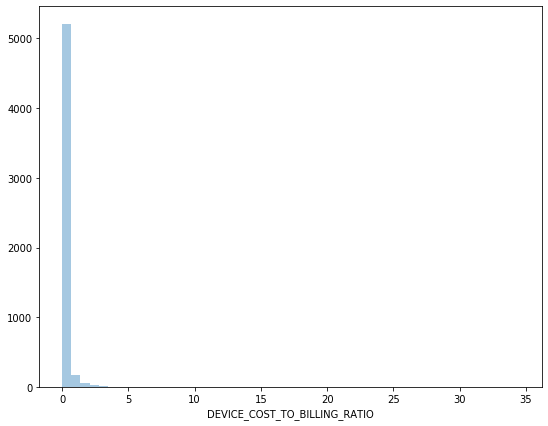

In [69]:
sns.distplot(input_dataset3["DEVICE_COST_TO_BILLING_RATIO"], kde=False)

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

This is an exponential distribution. It makes sense most of the values of the ratio are 0 or near 0 because few people pay the smartphones in installments and the people that pay, pay small quantities every month since phones are not that expensive.

## 2.7. Text parsing/processing

In machine learning, text processing is a very useful tool that can be used to improve datasets. In some use cases, for instance customer care applications using digital channels as Whatsapp, Facebook, etc..., data scientist teams mainly work with text data.

One of the text processing technique is to extract concrete words or tokens from a sentence or documents. Regular expressions are a great tool to extract data trough these patterns.

In this dataset, note that **PURCHASED_DEVICE** is a variable that is formed by a "**device_code**"+"**_**"+"**manufacture name**"+"**  **"+"**device model**". We want to split this variable into its components.

Tip: use [str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to separate a string into several parts.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [98]:
def split_code(x):
    return x.split("_")[0]

def split_manufacturer(x):
    return x.split(" ")[0].split("_")[1]

def split_model(x):
    return " ".join(x.split(" ")[1:])


input_dataset3["PURCHASED_DEVICE_CODE"] = input_dataset3["PURCHASED_DEVICE"].apply(split_code)
input_dataset3["PURCHASED_DEVICE_MANUFACTURER"] = input_dataset3["PURCHASED_DEVICE"].apply(split_manufacturer)
input_dataset3["PURCHASED_DEVICE_MODEL"] = input_dataset3["PURCHASED_DEVICE"].apply(split_model)

input_dataset3.tail()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MAX,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_MEAN,DEVICE_COST_MONTH_MIN,DEVICE_COST_MONTH_MAX,DEVICE_COST_MONTH_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.31700,5755.0654,5755.0654,5290.147500,2917.549800,4494.50200,597.79999,...,160.57,-44.39,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.2180,14820.2180,19684.520000,10024.089000,7423.10740,247.50000,...,51.67,-1.30,0.0,0.0,0.0,0.0,0.000000,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.0174,335.0174,171.912730,555.694210,425.69946,88.50000,...,134.99,0.00,9.0,9.0,9.0,0.0,0.066672,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.5484,155.5484,51.755936,62.371407,230.53328,38.50000,...,134.99,-68.54,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9999,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,0.00000,0.0000,0.0000,20.529335,84.687576,215.02301,0.00000,...,114.99,-39.99,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [86]:
devices_by_manufacturer = input_dataset3.groupby(["PURCHASED_DEVICE_MANUFACTURER"]).agg({"PURCHASED_DEVICE": "count"})
print(devices_by_manufacturer)
devices_by_previous_manuf = input_dataset3.groupby(["PREVIOUS_DEVICE_MANUF"]).agg({"PREVIOUS_DEVICE_MODEL": "count"})
print(devices_by_previous_manuf)


                               PURCHASED_DEVICE
PURCHASED_DEVICE_MANUFACTURER                  
ALCATEL                                     230
APPLE                                       426
ASUS                                          2
LG                                         3245
MOTOROLA                                    595
SAMSUNG                                    1022
                                               PREVIOUS_DEVICE_MODEL
PREVIOUS_DEVICE_MANUF                                               
ASUSTek Computer Inc                                              95
Apple Inc                                                       1404
BLU Products Inc                                                  24
Beijing Flyscale Technologies Company Limited                      1
BlackBerry Limited                                                 5
...                                                              ...
United Time Hong Kong Ltd                                       

## 2.8. Splitting and sampling a dataset

Splitting and sampling dataset are techniques that distribute the original dataset in n-parts. One of the most interesting application of these tools is to separate the dataset to train and test a machine learning model. Meanwhile sampling guarantees same type of data (i.e. distributions), splitting will separate the dataset with the ratio we need. Usually, 80%-20% or 70%-30% splitting ratios are the most common used.

Once again, Sklearn library helps to us to cover this necessity through the function [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which splits a dataset into two parts, which usually will be used for training and testing.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 80% of the rows and the other with 20% of rows</font>

In [95]:
X_train, X_test = train_test_split(input_dataset3, test_size=0.2, random_state=True)

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

In [96]:
cols = ["DATA_TRAFFIC_MONTH_1", "VOICE_TRAFFIC_MONTH_1", "BILLING_MONTH_1"]
X_train[cols].describe()

,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,4416.000000,4416.000000,4416.000000
mean,2583.511363,128.179280,99.333605
std,5776.947780,193.333075,63.755229
min,0.000000,0.000000,0.000000
25%,0.000000,9.875000,63.000000
50%,403.885895,63.049999,92.955000
75%,2693.665475,165.050000,121.140000
max,112421.170000,2861.000000,926.410000


In [97]:
X_test[cols].describe()

,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,1104.000000,1104.000000,1104.000000
mean,2586.459982,140.357518,103.715725
std,5873.777648,227.831258,67.432336
min,0.000000,0.000000,0.000000
25%,0.000000,10.000000,68.497500
50%,430.119765,61.750000,98.260000
75%,2903.805450,188.000003,121.140000
max,97074.617000,4113.000000,820.400000


Since I set a random_state to true, the data is shuffled, that's why the statistics are similar. 

# 3. Comparing iPhone and Samsung J series users

Finally, find some features that are different between users of an Apple iPhone and users of a Samsung J series phone (this includes J410G, J610G, J415G, and all other models by Samsung that start with a *J*).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [115]:
samsung_j = input_dataset3[input_dataset3["PURCHASED_DEVICE_MANUFACTURER"] == "SAMSUNG"]
samsung_j = samsung_j[samsung_j["PURCHASED_DEVICE_MODEL"].str.startswith("J")]

apple = input_dataset3[input_dataset3["PURCHASED_DEVICE_MANUFACTURER"] == "APPLE"]

<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

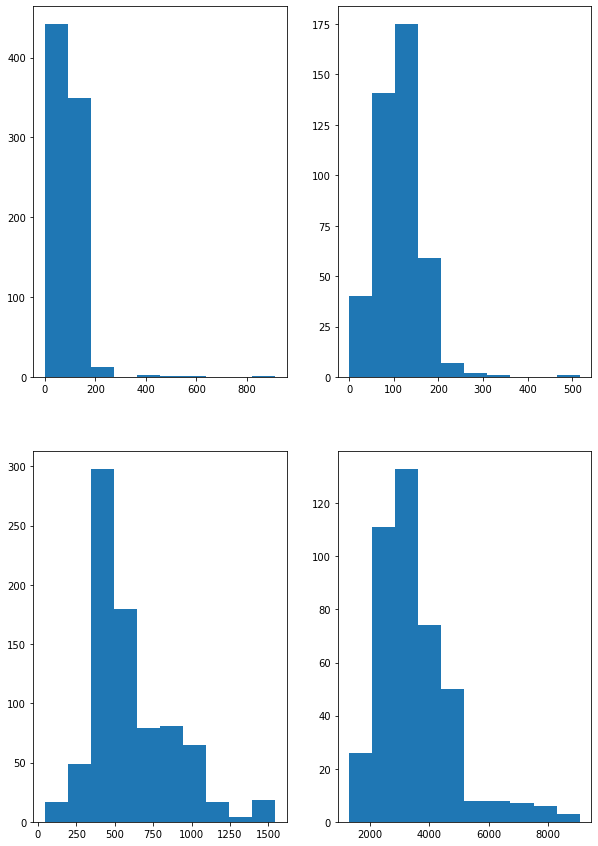

In [118]:
i = 221    
cols = ['BILLING_MONTH_MAX', 'DEVICE_VALUE']
plt.figure(figsize = (10, 15))
for c in cols:
    plt.subplot(i)
    plt.hist(samsung_j[c])
    i+=1
    plt.subplot(i)
    plt.hist(apple[c])
    i+=1

We can see that there are less users of iPhone than of Samsung. Monthly they pay similar valued bills.
Also, iphones cost more than samsungs.

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/data-mining-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, remember what you learned in machine learning and create a simple [decision tree model](https://scikit-learn.org/stable/modules/tree.html) having as input variables:

1. PREVIOUS\_DEVICE\_MODEL
1. PREVIOUS\_DEVICE\_BRAND
1. MONTHS\_LAST\_DEVICE

And as output variable `PURCHASED_DEVICE_MANUFACTURER`. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.


**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: model purchased device</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>